# Libraries

In [1]:
import pandas as pd
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import gower
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

# Loading the Clustering DF

In [2]:
# Path settings csv file
csv_filepath = '../data/processed/df_analysis.csv'

# Loading the csv file
df_original = pd.read_csv(csv_filepath)
print("Data loaded successfully")

Data loaded successfully


# Cluster Analysis

## Cluster Visualization and Testing

### Mental Health Conditions

#### Feature: Diagnosed Mental Health Condition by Professional

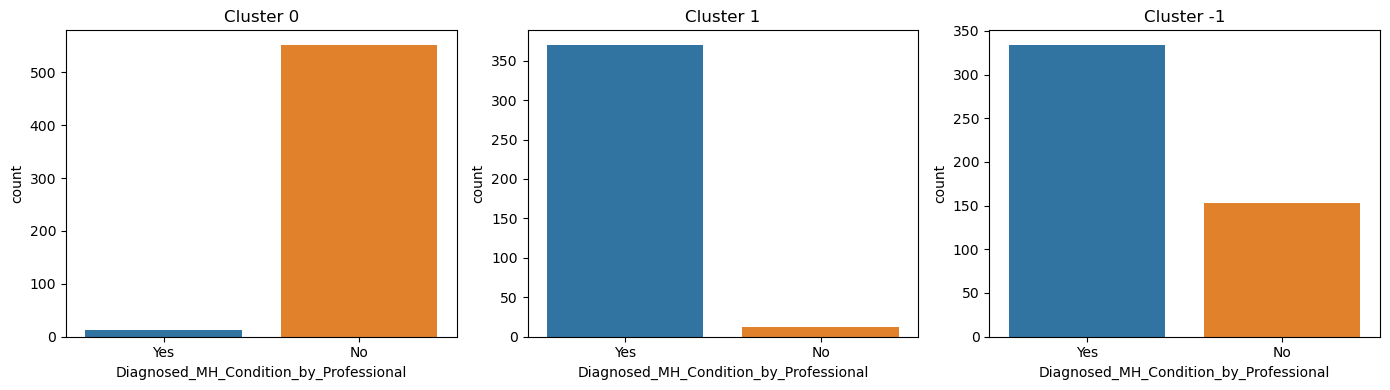

In [3]:
# Define the categorical feature you want to analyze
categorical_feature_6 = "Diagnosed_MH_Condition_by_Professional"

# Define a consistent color palette
palette = sns.color_palette("tab10")

# Create subplots for each cluster
plt.figure(figsize=(14, 4))
for i, cluster in enumerate(df_original['clusters'].unique(), 1):
    plt.subplot(1, len(df_original['clusters'].unique()), i)
    sns.countplot(data=df_original[df_original['clusters'] == cluster], x=categorical_feature_6, palette=palette)
    plt.title(f'Cluster {cluster}')
plt.tight_layout()
plt.show()

This is probably the most interesting and obvious difference between the three clusters so far. While almost all respondents from cluster 0 were not diagnosed with a mental illness, almost all respondents from cluster 1 were diagnosed with a mental illness by a specialist. In Cluster -1, the sick predominate, although a larger proportion are also undiagnosed here. 

##### Chi-square goodness of fit test

In [4]:
# Define the contingency table
contingency_table = pd.crosstab(index=df_original['clusters'], columns=df_original[categorical_feature_6])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
if p_value < 0.05:
    print("The difference is significant.")
else:
    print("The difference is not significant.")

Chi-square statistic: 919.7999273106584
P-value: 1.8534614473623526e-200
The difference is significant.


####  Feature: Current Mental Health Disorder

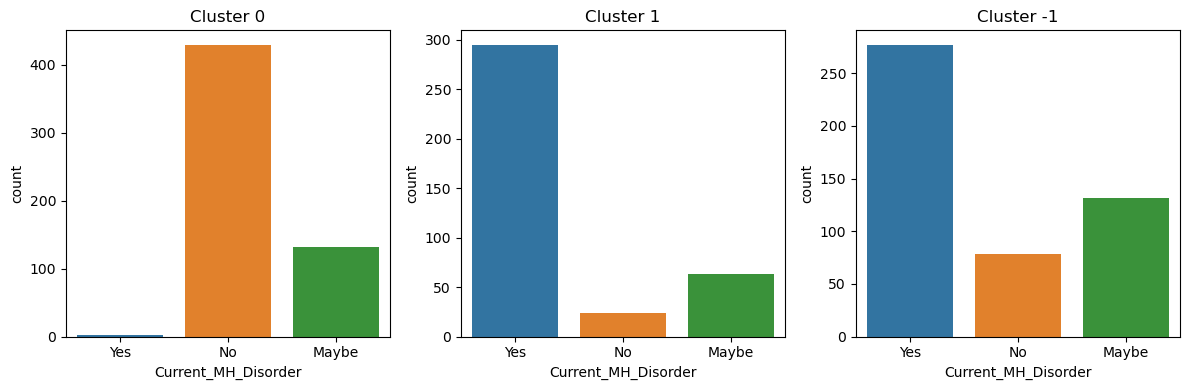

In [5]:
categorical_feature_11 = "Current_MH_Disorder"

# Define a fixed order for the categories
categories_order = ['Yes', 'No', 'Maybe']

# Define a consistent color palette
palette = sns.color_palette("tab10")

# Create subplots for each cluster
plt.figure(figsize=(12, 4))
for i, cluster in enumerate(df_original['clusters'].unique(), 1):
    plt.subplot(1, len(df_original['clusters'].unique()), i)
    sns.countplot(data=df_original[df_original['clusters'] == cluster], x=categorical_feature_11, order=categories_order, palette=palette)
    plt.title(f'Cluster {cluster}')
plt.tight_layout()
plt.show()

Here, too, there is an obvious difference between the three clusters. The respondents in cluster 0 appear to be mostly healthy, while almost all respondents in cluster 1 are currently suffering from a mental illness. In cluster 3, the answers are diverse. 

##### Chi-square goodness of fit test

In [6]:
# Define the contingency table
contingency_table = pd.crosstab(index=df_original['clusters'], columns=df_original[categorical_feature_11])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
if p_value < 0.05:
    print("The difference is significant.")
else:
    print("The difference is not significant.")

Chi-square statistic: 783.5512608237294
P-value: 2.80640342883898e-168
The difference is significant.


#### Feature: Sought Treatment MH Professional

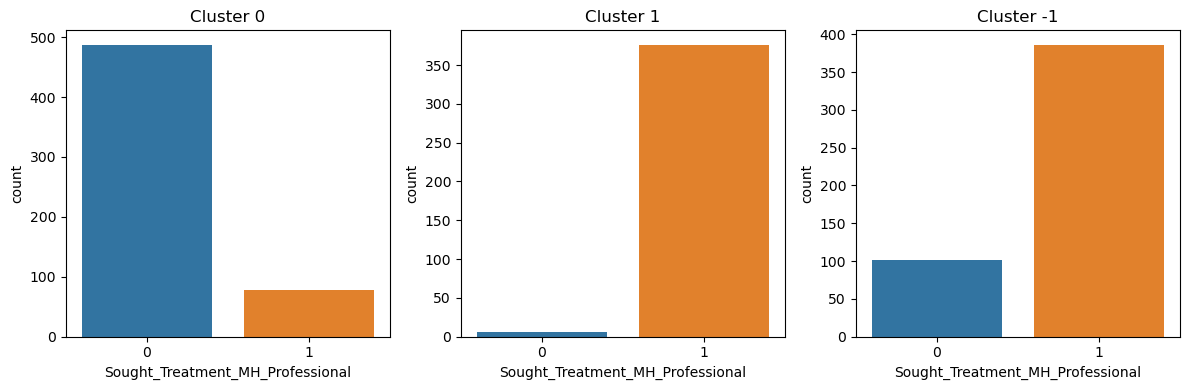

In [7]:
categorical_feature_10 = "Sought_Treatment_MH_Professional"

# Define a consistent color palette
palette = sns.color_palette("tab10")

# Create subplots for each cluster
plt.figure(figsize=(12, 4))
for i, cluster in enumerate(df_original['clusters'].unique(), 1):
    plt.subplot(1, len(df_original['clusters'].unique()), i)
    sns.countplot(data=df_original[df_original['clusters'] == cluster], x=categorical_feature_10, palette=palette)
    plt.title(f'Cluster {cluster}')
plt.tight_layout()
plt.show()

In cluster 0, the majority of respondents did not seek psychological help, while in cluster 1 almost all and in cluster -1 the majority sought psychological help. 

##### Chi-square goodness of fit test

In [8]:
# Define the contingency table
contingency_table = pd.crosstab(index=df_original['clusters'], columns=df_original[categorical_feature_10])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
if p_value < 0.05:
    print("The difference is significant.")
else:
    print("The difference is not significant.")

Chi-square statistic: 804.8518212175394
P-value: 1.6929637059182218e-175
The difference is significant.


### Working Conditions

#### Feature: Neg_Cons_MH_Discussion_Employer

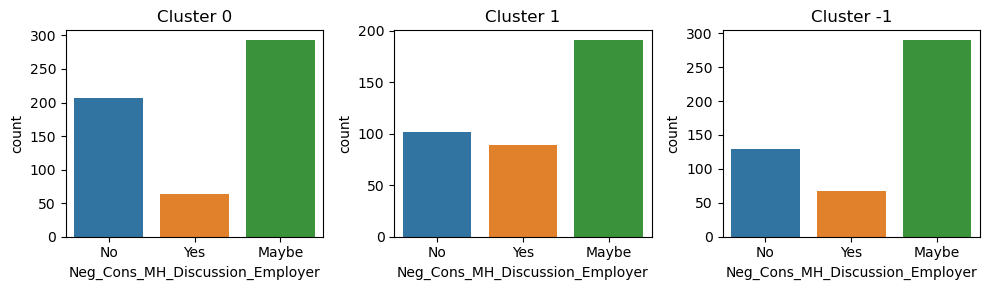

In [9]:
categorical_feature_1 = "Neg_Cons_MH_Discussion_Employer"
# Define a fixed order for the categories
categories_order = ["No", 'Yes', 'Maybe']

# Define a consistent color palette
palette = sns.color_palette("tab10")

# Create subplots for each cluster
plt.figure(figsize=(10, 3))
for i, cluster in enumerate(df_original['clusters'].unique(), 1):
    plt.subplot(1, len(df_original['clusters'].unique()), i)
    sns.countplot(data=df_original[df_original['clusters'] == cluster], x=categorical_feature_1, order=categories_order, palette=palette)
    plt.title(f'Cluster {cluster}')
plt.tight_layout()
plt.show()

Respondents from cluster 1 are relatively more likely to fear negative consequences from talking about their mental health problems with their employer.

##### Chi-square goodness of fit test

In [10]:
# Define the contingency table
contingency_table = pd.crosstab(index=df_original['clusters'], columns=df_original[categorical_feature_1])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
if p_value < 0.05:
    print("The difference is significant.")
else:
    print("The difference is not significant.")

Chi-square statistic: 37.91856150722761
P-value: 1.1647530999579751e-07
The difference is significant.


#### Feature: Medical_Leave_Policy

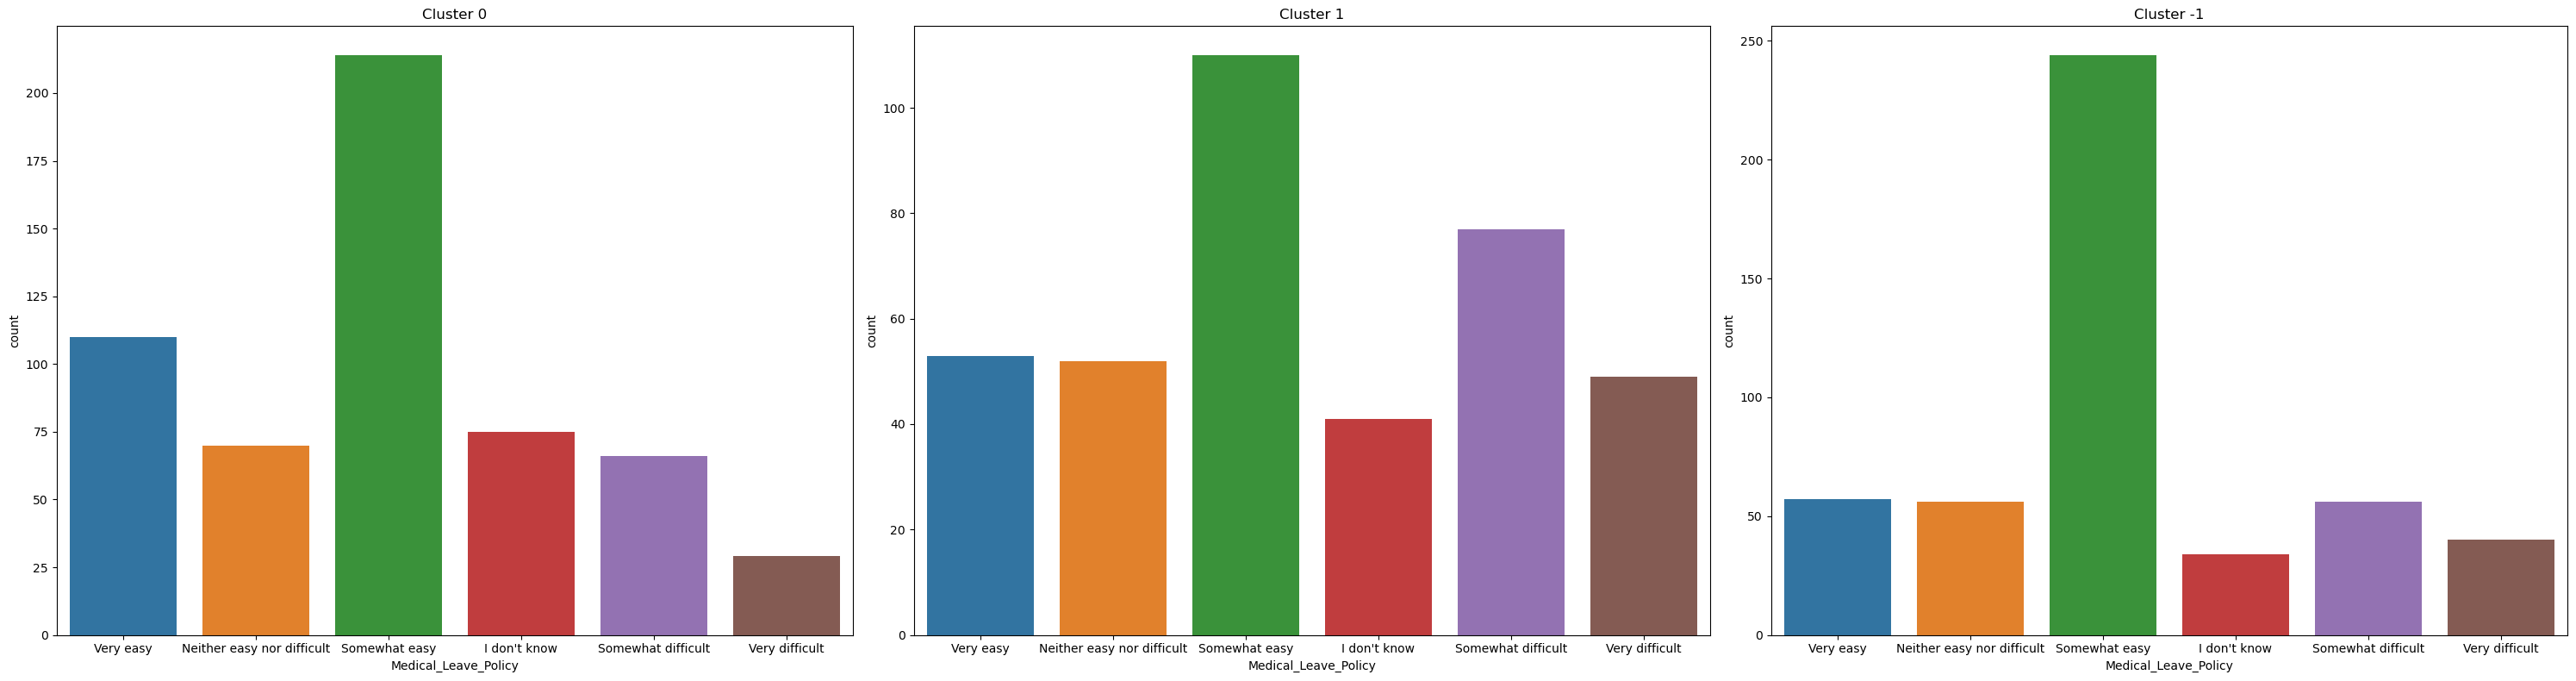

In [11]:
categorical_feature_2 = "Medical_Leave_Policy"
# Define a fixed order for the categories
categories_order = ['Very easy', 'Neither easy nor difficult', 'Somewhat easy', "I don't know", 'Somewhat difficult', 'Very difficult']

# Define a consistent color palette
palette = sns.color_palette("tab10")

# Create subplots for each cluster
plt.figure(figsize=(30, 8))
for i, cluster in enumerate(df_original['clusters'].unique(), 1):
    plt.subplot(1, len(df_original['clusters'].unique()), i)
    sns.countplot(data=df_original[df_original['clusters'] == cluster], x=categorical_feature_2, order=categories_order, palette=palette)
    plt.title(f'Cluster {cluster}')
plt.tight_layout()
plt.show()


In contrast to the other respondents, respondents from cluster 1 stated proportionally more often that it would be more difficult to ask for time off in the event of mental problems at work. 

##### Chi-square goodness of fit test

In [12]:
# Define the contingency table
contingency_table = pd.crosstab(index=df_original['clusters'], columns=df_original[categorical_feature_2])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
if p_value < 0.05:
    print("The difference is significant.")
else:
    print("The difference is not significant.")

Chi-square statistic: 78.14356542840878
P-value: 1.1592012324703956e-12
The difference is significant.


#### Feature: MH_Benefits_Provided


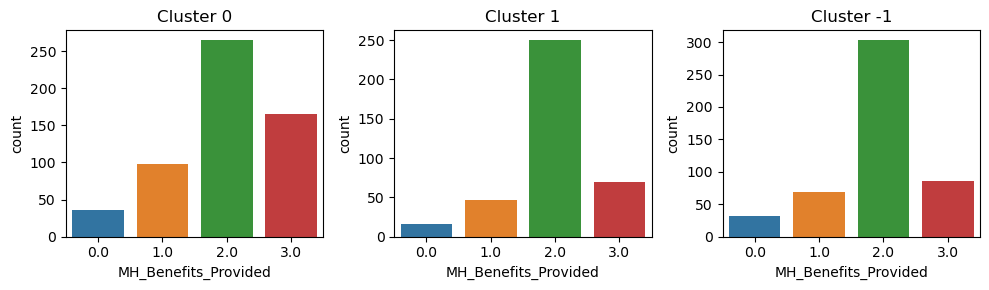

Not eligible for coverage / N/A: 0, No: 1, Yes: 2, I don't know: 3


In [13]:
categorical_feature_3 = "MH_Benefits_Provided"

# Define a consistent color palette
palette = sns.color_palette("tab10")

# Create subplots for each cluster
plt.figure(figsize=(10, 3))
for i, cluster in enumerate(df_original['clusters'].unique(), 1):
    plt.subplot(1, len(df_original['clusters'].unique()), i)
    sns.countplot(data=df_original[df_original['clusters'] == cluster], x=categorical_feature_3, palette=palette)
    plt.title(f'Cluster {cluster}')
plt.tight_layout()
plt.show()

print("Not eligible for coverage / N/A: 0, No: 1, Yes: 2, I don't know: 3")

Compared to the other clusters, a relatively large number of respondents in cluster 0 stated that they did not know whether the company provided mental health care benefits as part of healthcare coverage.

##### Chi-square goodness of fit test

In [14]:
# Define the contingency table
contingency_table = pd.crosstab(index=df_original['clusters'], columns=df_original[categorical_feature_3])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
if p_value < 0.05:
    print("The difference is significant.")
else:
    print("The difference is not significant.")

Chi-square statistic: 44.13347883926098
P-value: 6.954961376134123e-08
The difference is significant.


### Feature: Remote Work

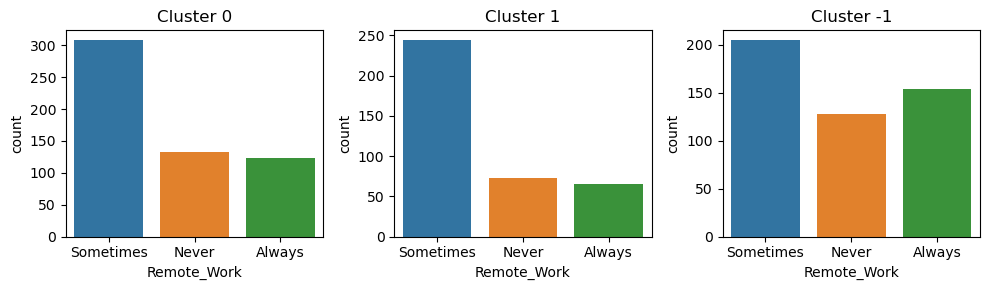

In [15]:
categorical_feature_9 = "Remote_Work"

# Define a fixed order for the categories
categories_order = ['Sometimes', 'Never', 'Always']

# Define a consistent color palette
palette = sns.color_palette("tab10")

# Create subplots for each cluster
plt.figure(figsize=(10, 3))
for i, cluster in enumerate(df_original['clusters'].unique(), 1):
    plt.subplot(1, len(df_original['clusters'].unique()), i)
    sns.countplot(data=df_original[df_original['clusters'] == cluster], x=categorical_feature_9, order=categories_order, palette=palette)
    plt.title(f'Cluster {cluster}')
plt.tight_layout()
plt.show()

The clusters also differ greatly from one another in this characteristic. For example, respondents who always work from home are significantly more frequently represented in cluster -1 than in the other two clusters. At the same time, however, there is also an accumulation of people who never work from home. 

##### Chi-square goodness of fit test

In [16]:
# Define the contingency table
contingency_table = pd.crosstab(index=df_original['clusters'], columns=df_original[categorical_feature_9])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
if p_value < 0.05:
    print("The difference is significant.")
else:
    print("The difference is not significant.")

Chi-square statistic: 45.09440233155697
P-value: 3.8002681806743564e-09
The difference is significant.


### Demographic Information

#### Feature: Age

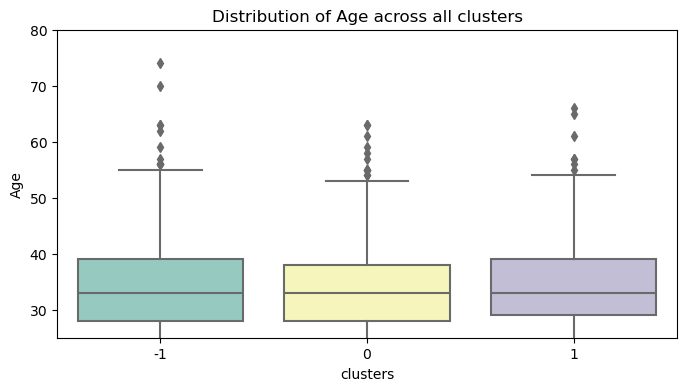

In [17]:
numerical_feature_1 = "Age"

# Create box plot with hue as cluster
plt.figure(figsize=(8, 4))
sns.boxplot(x='clusters', y=numerical_feature_1, data=df_original, palette="Set3")
plt.title(f'Distribution of {numerical_feature_1} across all clusters')
plt.ylim(25, 80)  # Set the y-axis limits
plt.show()

Obviously there is not difference between the age distributions of the three clusters

##### ANOVA test for numerical feature

In [18]:
# Prepare data for two-way ANOVA test
groups = [df_original[df_original['clusters'] == cluster][numerical_feature_1] for cluster in df_original['clusters'].unique()]

# Perform two-way ANOVA test
f_statistic, p_value = f_oneway(*groups)

# Display the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("The difference is significant.")
else:
    print("The difference is not significant.")


F-statistic: 0.06282137915805545
P-value: 0.9391137951610056
The difference is not significant.


#### Feature: Gender

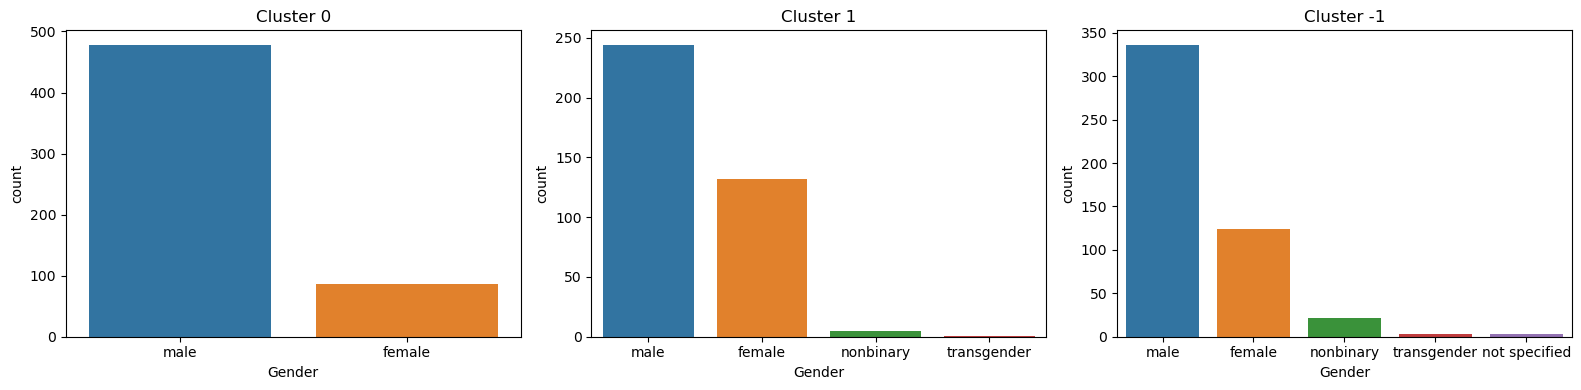

In [19]:
# Define the categorical feature you want to analyze
categorical_feature_5 = "Gender"

# Define a consistent color palette
palette = sns.color_palette("tab10")

# Create subplots for each cluster
plt.figure(figsize=(16, 4))
for i, cluster in enumerate(df_original['clusters'].unique(), 1):
    plt.subplot(1, len(df_original['clusters'].unique()), i)
    sns.countplot(data=df_original[df_original['clusters'] == cluster], x=categorical_feature_5, palette=palette)
    plt.title(f'Cluster {cluster}')
plt.tight_layout()
plt.show()

The clusters also differ in terms of gender. Cluster 0 is limited to the gender assignments male and female, while the other two clusters contain all other gender assignments.
Its interesting, that cluster 0 consists mainly of people who are mentally healthy, while cluster 1 consists of people who have mental health conditions. In this cluster people that do not fall
into classical gender roles are overpresented aswell as women. 

##### Chi-square goodness of fit test

In [20]:
# Define the contingency table
contingency_table = pd.crosstab(index=df_original['clusters'], columns=df_original[categorical_feature_5])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
if p_value < 0.05:
    print("The difference is significant.")
else:
    print("The difference is not significant.")

Chi-square statistic: 89.04341520981694
P-value: 7.271264160353426e-16
The difference is significant.


#### Feature: Work Position Description

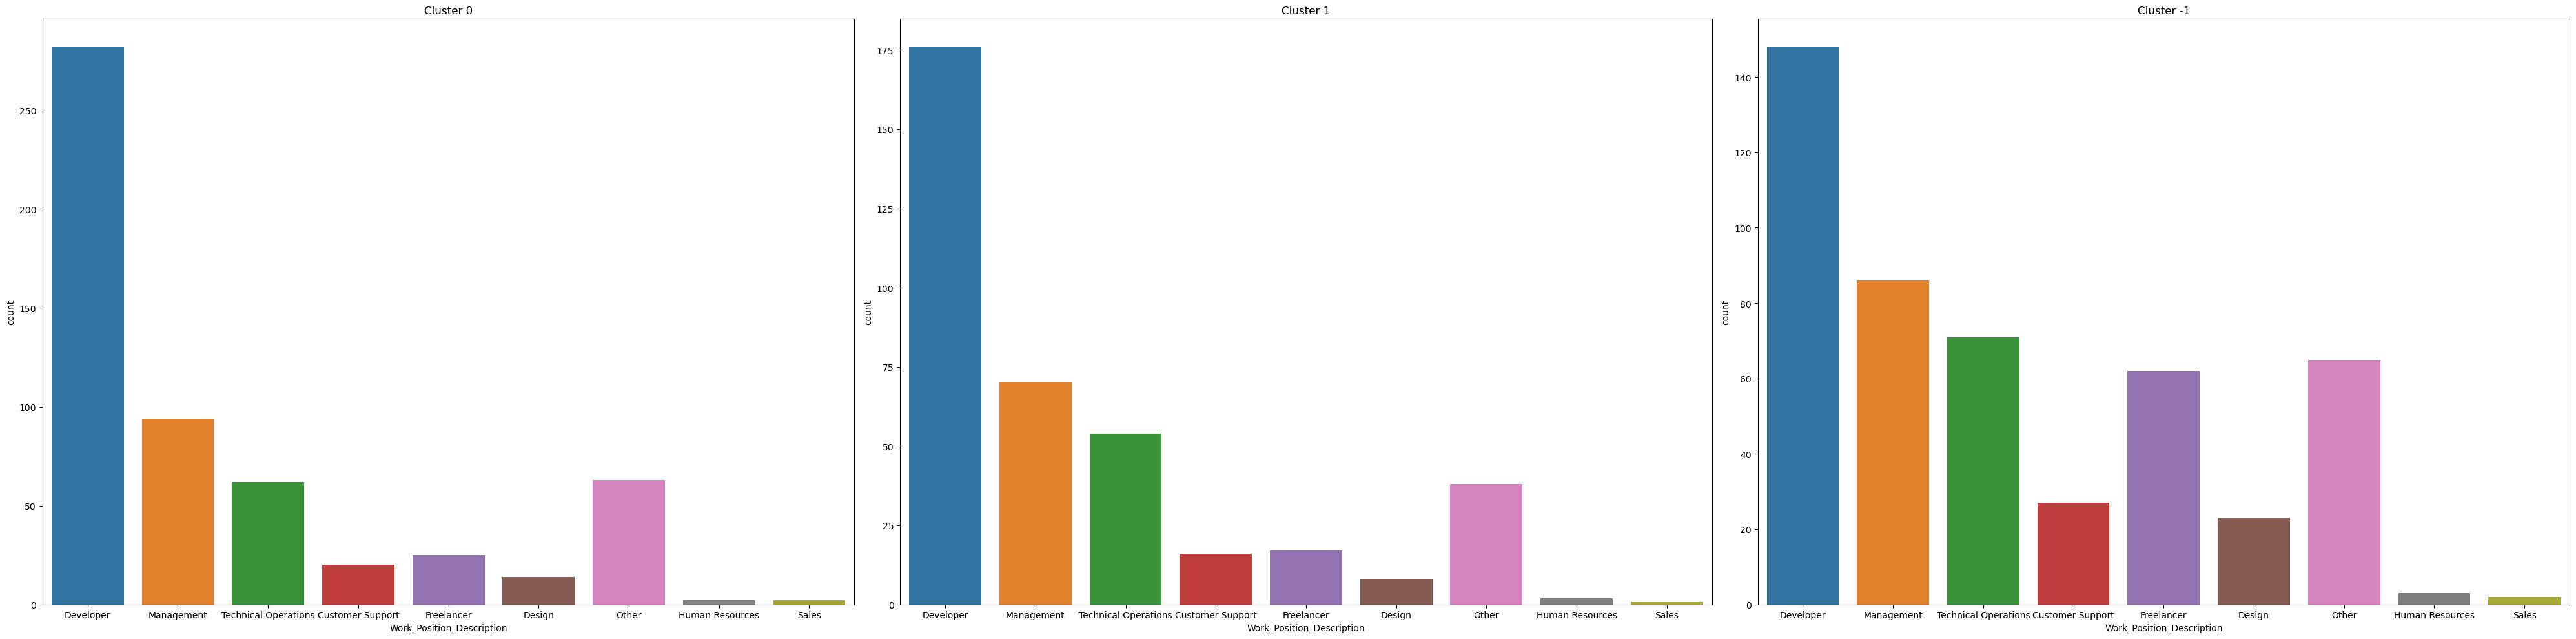

In [21]:
categorical_feature_8 = "Work_Position_Description"

# Define a fixed order for the categories
categories_order = ['Developer', 'Management', 'Technical Operations', 'Customer Support', 'Freelancer', 'Design', 'Other', 'Human Resources', 'Sales']

# Define a consistent color palette
palette = sns.color_palette("tab10")

# Create subplots for each cluster
plt.figure(figsize=(40, 10))
for i, cluster in enumerate(df_original['clusters'].unique(), 1):
    plt.subplot(1, len(df_original['clusters'].unique()), i)
    sns.countplot(data=df_original[df_original['clusters'] == cluster], x=categorical_feature_8, order=categories_order, palette=palette)
    plt.title(f'Cluster {cluster}')
plt.tight_layout()
plt.show()

In Cluster 1 und -1 scheint im Verhältnis zu Cluster 0 der Anteil an Managern und Beschäftigten im Bereich Technical Operations etwas größer zu sein.

##### Chi-square goodness of fit test

In [22]:
# Define the contingency table
contingency_table = pd.crosstab(index=df_original['clusters'], columns=df_original[categorical_feature_8])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
if p_value < 0.05:
    print("The difference is significant.")
else:
    print("The difference is not significant.")

Chi-square statistic: 70.61159442078609
P-value: 7.795820621144626e-09
The difference is significant.


#### Feature: Self_Employed

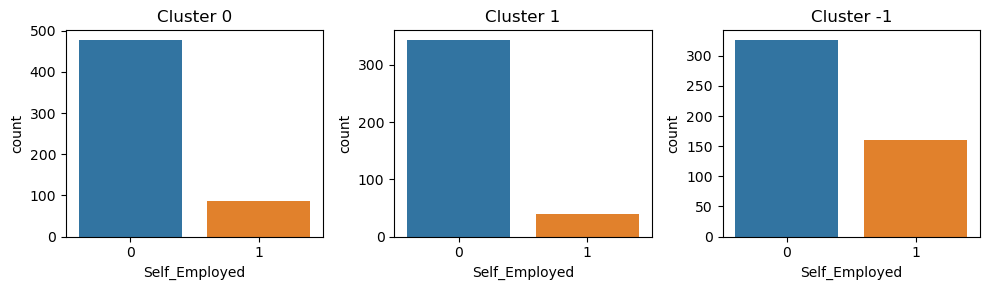

In [23]:
# Define the categorical feature you want to analyze
categorical_feature_4 = "Self_Employed"

# Define a consistent color palette
palette = sns.color_palette("tab10")

# Create subplots for each cluster
plt.figure(figsize=(10, 3))
for i, cluster in enumerate(df_original['clusters'].unique(), 1):
    plt.subplot(1, len(df_original['clusters'].unique()), i)
    sns.countplot(data=df_original[df_original['clusters'] == cluster], x=categorical_feature_4, palette=palette)
    plt.title(f'Cluster {cluster}')
plt.tight_layout()
plt.show()

As we can see here, the people of cluster -1 (noise points) are more often self employed. This makes sense because the lack of answers regarding their employer makes it more difficult to cluster them. 

##### Chi-square goodness of fit test

In [24]:
# Define the contingency table
contingency_table = pd.crosstab(index=df_original['clusters'], columns=df_original[categorical_feature_4])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
if p_value < 0.05:
    print("The difference is significant.")
else:
    print("The difference is not significant.")

Chi-square statistic: 82.08692253972598
P-value: 1.4964122414071022e-18
The difference is significant.


#### Feature: Continent_Residence

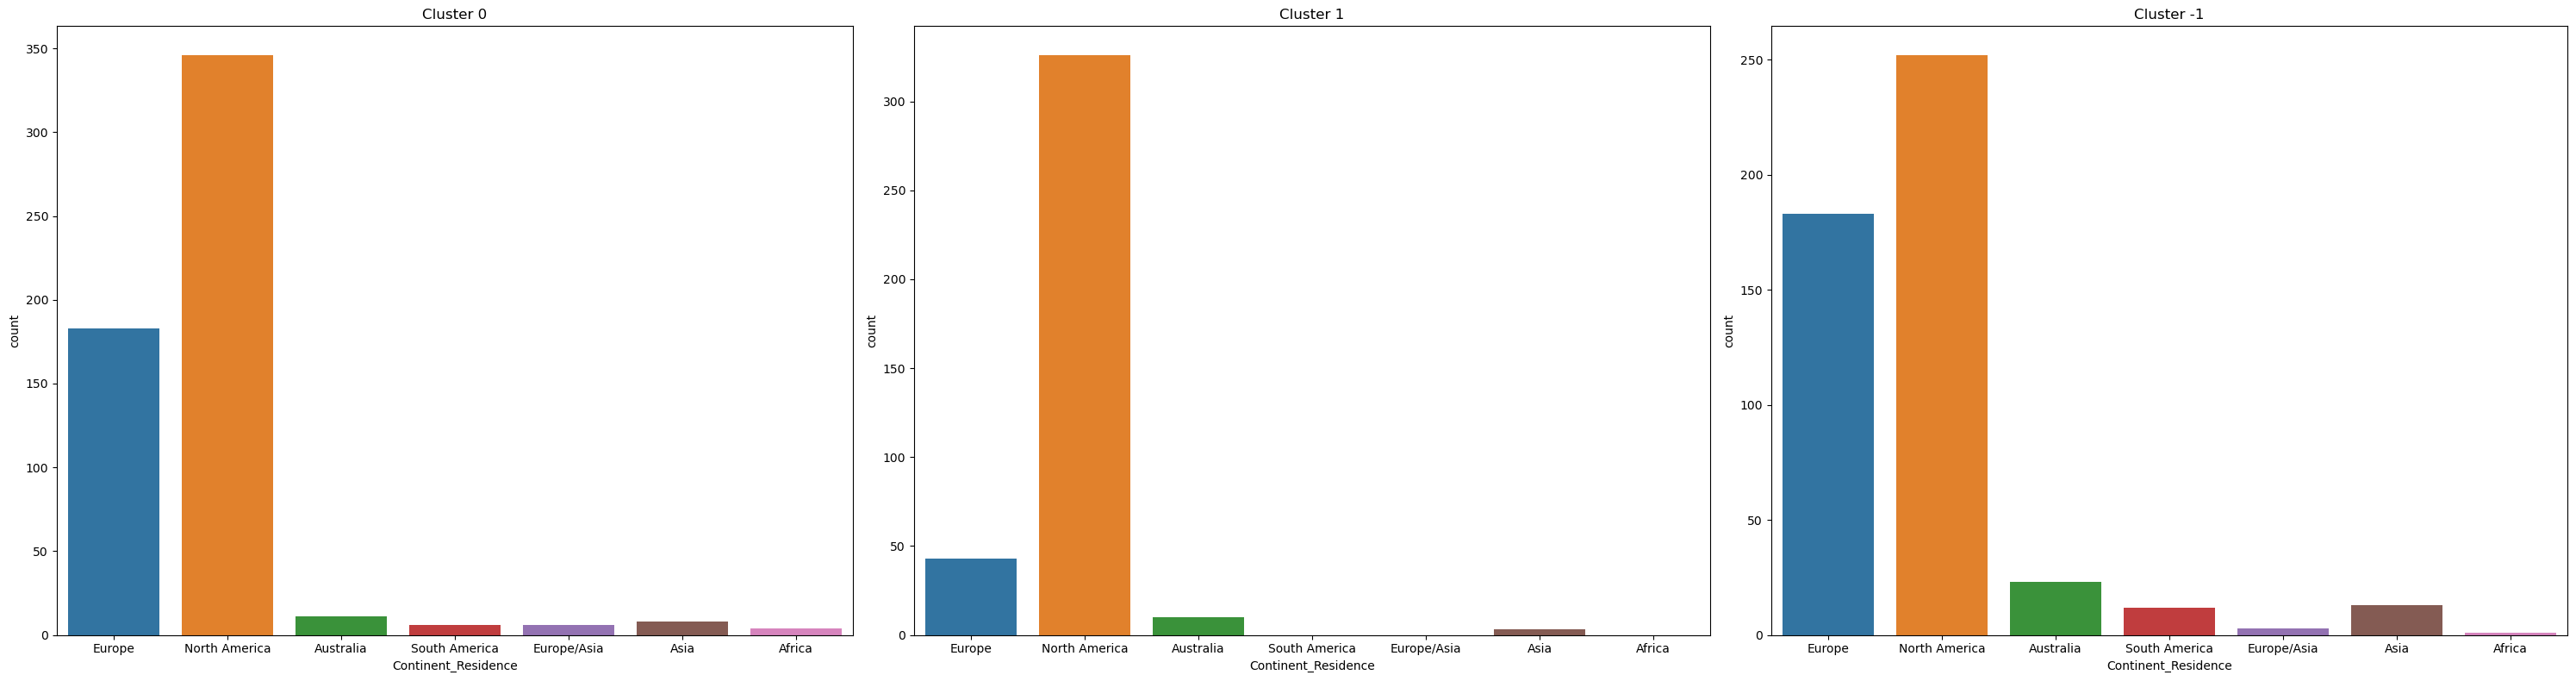

In [25]:
categorical_feature_7 = "Continent_Residence"

# Define a fixed order for the categories
categories_order = ["Europe", 'North America', 'Australia', 'South America', 'Europe/Asia', 'Asia', 'Africa']

# Define a consistent color palette
palette = sns.color_palette("tab10")

# Create subplots for each cluster
plt.figure(figsize=(30, 8))
for i, cluster in enumerate(df_original['clusters'].unique(), 1):
    plt.subplot(1, len(df_original['clusters'].unique()), i)
    sns.countplot(data=df_original[df_original['clusters'] == cluster], x=categorical_feature_7, order=categories_order, palette=palette)
    plt.title(f'Cluster {cluster}')
plt.tight_layout()
plt.show()


Although respondents from North America predominate in all clusters, the proportion of Europeans is significantly higher in clusters 0 and -1 than in cluster 1. 

##### Chi-square goodness of fit test

In [26]:
# Define the contingency table
contingency_table = pd.crosstab(index=df_original['clusters'], columns=df_original[categorical_feature_7])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
if p_value < 0.05:
    print("The difference is significant.")
else:
    print("The difference is not significant.")

Chi-square statistic: 126.0559743274615
P-value: 3.811125307495592e-21
The difference is significant.
